<a href="https://colab.research.google.com/github/pranao0609/Machine_Learning/blob/main/Multiple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df_index=pd.read_csv('economic_index.csv')

In [9]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2016,2,2.75,5.4,1394
1,1,2016,1,1.75,6.4,1357
2,2,2016,2,2.00,5.4,1394
3,3,2016,2,1.75,6.4,1434
4,4,2016,1,2.00,5.4,1357


In [10]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.4,1394
1,1.75,6.4,1357
2,2.00,5.4,1394
3,1.75,6.4,1434
4,2.00,5.4,1357


In [13]:
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


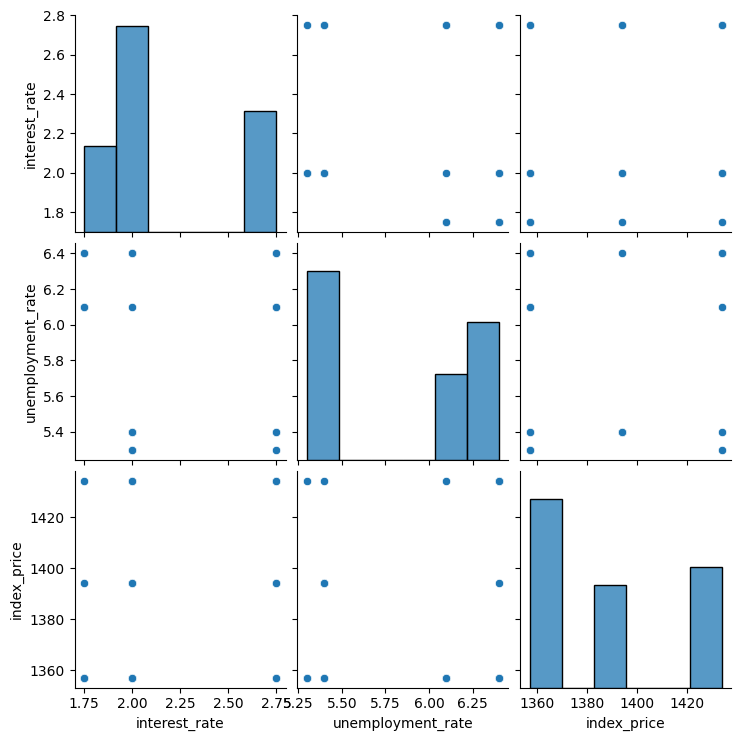

In [14]:
sns.pairplot(df_index)

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.113321,0.242461
unemployment_rate,-0.113321,1.000000,0.098374
index_price,0.242461,0.098374,1.000000


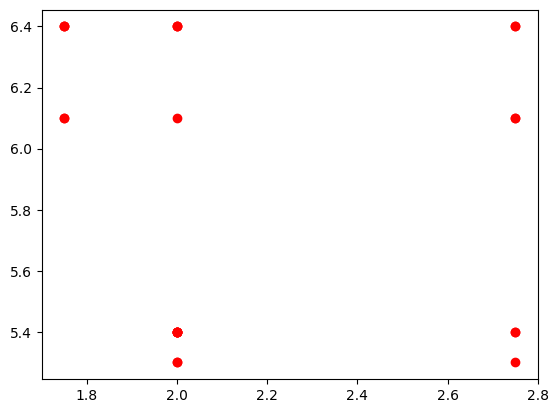

In [16]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')

In [17]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.4
1,1.75,6.4
2,2.00,5.4
3,1.75,6.4
4,2.00,5.4


In [19]:
y

,index_price
0,1394
1,1357
2,1394
3,1434
4,1357
5,1357
6,1357
7,1394
8,1357
9,1357


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

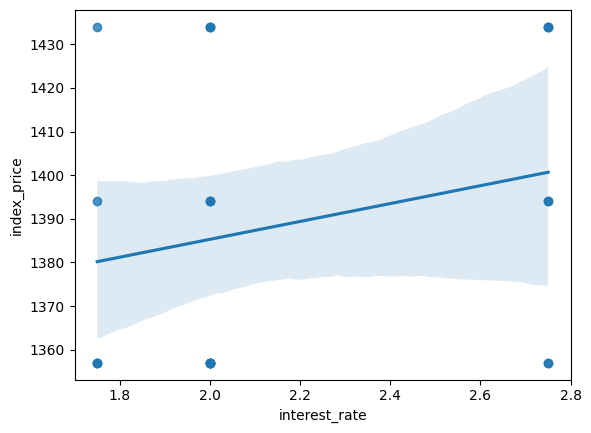

In [25]:
sns.regplot(x="interest_rate",y="index_price",data=df_index)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
X_train

array([[ 1.55874878,  1.18444612],
       [-1.05124918,  1.18444612],
       [-0.39874969, -0.90575292],
       [-0.39874969,  0.55738641],
       [-0.39874969, -0.90575292],
       [-0.39874969, -0.90575292],
       [-1.05124918,  0.55738641],
       [-1.05124918,  1.18444612],
       [-0.39874969, -0.90575292],
       [ 1.55874878,  0.55738641],
       [ 1.55874878, -0.90575292],
       [-0.39874969, -1.11477282],
       [-1.05124918,  1.18444612],
       [-0.39874969, -0.90575292],
       [ 1.55874878, -1.11477282],
       [ 1.55874878,  1.18444612],
       [-0.39874969, -1.11477282],
       [-0.39874969,  1.18444612]])

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

In [30]:
y_pred=lr.predict(X_test)

In [31]:
y_pred

array([1384.12473759, 1384.44329288, 1391.94778722, 1388.3050783 ,
       1394.87402571, 1388.3050783 ])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

28.791036255802585
1015.3288251455346
31.864224847711807


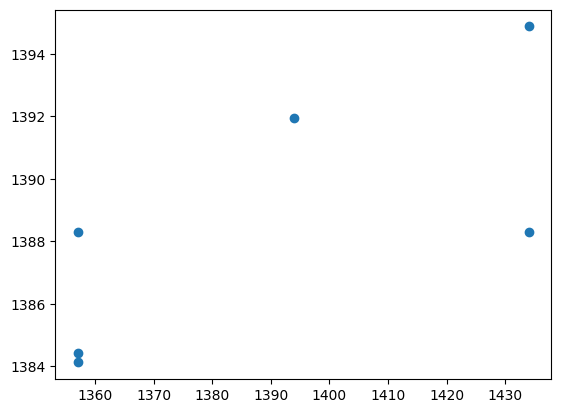

In [33]:
plt.scatter(y_test,y_pred)

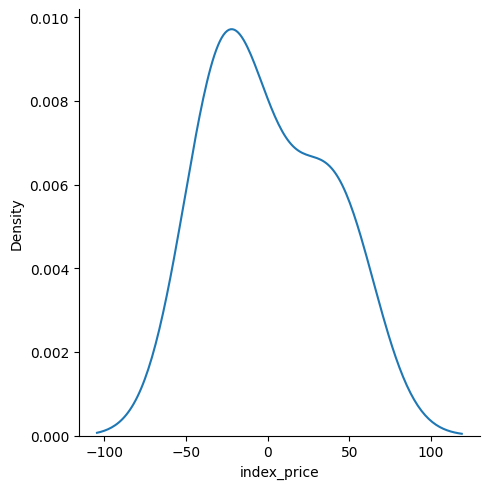

In [34]:
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

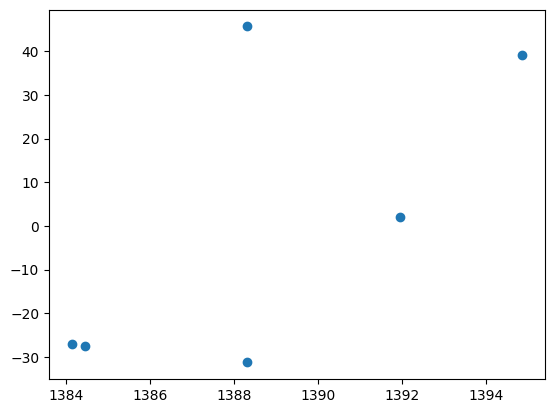

In [35]:
plt.scatter(y_pred,residuals)

In [36]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [38]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.125
Method:                 Least Squares   F-statistic:                          7.942e-05
Date:                Tue, 24 Dec 2024   Prob (F-statistic):                        1.00
Time:                        13:19:56   Log-Likelihood:                         -155.80
No. Observations:                  18   AIC:                                      315.6
Df Residuals:                      16   BIC:                                      317.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1001    347.701      0.012      0.991    -732.993     741.193
x2             1.7515    347.701      0.005      0.996    -735.342     738.845
==============================================================================
Omnibus:                        5.645   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.797
Skew:                           0.312   Prob(JB):                        0.407
Kurtosis:                       1.583   Cond. No.                         1.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
print(lr.coef_)

[4.10013903 1.7515356 ]
